In [1]:
import sys

from pandas               import DataFrame
from pandas               import Series
from pandas               import read_csv
from pandas               import get_dummies
from numpy                import array
from numpy                import random
from numpy                import where
from numpy                import nan
from scipy.stats.mstats   import winsorize
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from datetime import datetime
from scipy.stats          import pearsonr

In [2]:
sys.path.append(r"C:\Users\cpirela\Desktop\Dscrp")

In [3]:
from ieseg import partition
from ieseg import roc

In [4]:
#Loading data

In [5]:
directory = r"C:\Users\cpirela\Desktop\Dscrp"
inputData = directory + "/Data"

In [6]:
donors=read_csv(inputData + "/donors.csv")

# Cleaning of Donors

In [7]:
donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,D100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,D100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,D100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,D100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [8]:
donors.dtypes

donorID         object
zipcode        float64
province        object
region          object
gender          object
language        object
dateOfBirth     object
dtype: object

In [9]:
#Checking for missing values

In [10]:
missingdonorid=donors['donorID'].isna().sum()
missingdonorid

0

In [11]:
missingzip=donors['zipcode'].isna().sum()
missingzip

2

In [12]:
#Replacing missing values by the mode
donors['zipcode'] = donors['zipcode'].fillna(donors['zipcode'].mode().iloc[0])

In [13]:
missingzip=donors['zipcode'].isna().sum()
missingzip

0

In [14]:
missingprov=donors['province'].isna().sum()
missingprov

0

In [15]:
missingreg=donors['region'].isna().sum()
missingreg

0

In [16]:
missinggen=donors['gender'].isna().sum()
missinggen

32

In [17]:
#Replacing missing values by the mode
donors['gender'] = donors['gender'].fillna(donors['gender'].mode().iloc[0])

In [18]:
missinggen=donors['gender'].isna().sum()
missinggen

0

In [19]:
missinglan=donors['language'].isna().sum()
missinglan

0

In [20]:
missingdate=donors['dateOfBirth'].isna().sum()
missingdate

0

In [21]:
donors['donorID'].nunique()

44691

In [22]:
#Checking duplicated values in donorID
donors['donorID'].duplicated().value_counts()

donorID
False    44691
Name: count, dtype: int64

In [23]:
donors['province'].unique()

array(['Flemish Brabant', 'Antwerp', 'Brussels', 'Walloon Brabant',
       'West Flanders', 'East Flanders', 'Liege', 'Luxembourg', 'Namur',
       'Hainaut', 'Limburg', 'ANTWERP', 'Missing'], dtype=object)

In [24]:
#Here we see inputted 'missing' string for missing values that need cleaning, will insert mode:
modeprov= donors['province']. mode().iloc[0]
donors['province'] = donors['province'].replace({'Missing': modeprov})

In [25]:
dictionaryprov= {'Flemish Brabant': 1, 'Antwerp': 2,'Brussels': 3, 'Walloon Brabant': 4,'West Flanders': 5, 'East Flanders': 6,'Liege': 7, 'Luxembourg': 8,'Namur': 9, 'Hainaut': 10,'Limburg': 11, 'ANTWERP': 2}
donors = donors.replace({'province': dictionaryprov})

In [26]:
donors['region'].unique()

array(['Flanders', 'Brussels', 'Wallonia', 'Missing'], dtype=object)

In [27]:
#Here we see inputted 'missing' string for missing values that need cleaning, will insert mode:
modereg= donors['region']. mode().iloc[0]
donors['region'] = donors['region'].replace({'Missing': modereg})

In [28]:
dictionaryreg= {'Flanders': 1, 'Brussels': 2,'Wallonia': 3}
donors = donors.replace({'region': dictionaryreg})

In [29]:
donors['gender'].unique()

array(['F', 'M'], dtype=object)

In [30]:
dictionarygen = {'M': 1, 'F': 0}
donors = donors.replace({'gender': dictionarygen})

In [31]:
donors['language'].unique()

array(['NL', 'FR', 'EN'], dtype=object)

In [32]:
dictionarylan = {'NL': 1, 'FR': 2, 'EN':3}
donors = donors.replace({'language': dictionarylan})

In [33]:
donors['zipcode']=donors['zipcode'].astype(int)

In [34]:
import pandas as pd
donors['dateOfBirth']=pd.to_datetime(donors['dateOfBirth'])

In [35]:
#Final Types
donors.dtypes

donorID                object
zipcode                 int32
province                int64
region                  int64
gender                  int64
language                int64
dateOfBirth    datetime64[ns]
dtype: object

In [36]:
#Final Table
donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,D100001,1861,1,1,0,1,1967-12-24
1,D100002,2260,2,1,1,1,1952-01-14
2,D100003,1780,1,1,1,1,1986-12-23
3,D100004,1020,3,2,0,2,1952-03-29
4,D100005,1020,3,2,0,2,1986-06-25


# Cleaning of Campaigns

In [37]:
campaigns=read_csv(inputData + "/campaigns.csv",sep=";")

In [38]:
campaigns.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [39]:
campaigns.dtypes

campaignID      int64
date           object
lettersSent    object
CostUnit       object
dtype: object

In [40]:
campaigns['date'] = pd.to_datetime(campaigns['date'])

C:\Users\cpirela\AppData\Local\Temp\ipykernel_24544\3114713077.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  campaigns['date'] = pd.to_datetime(campaigns['date'])


In [41]:
campaigns = campaigns[campaigns['date'] > '2014-12-01']

In [42]:
campaignsid = campaigns['campaignID'].isna().sum
campaignsid

<bound method NDFrame._add_numeric_operations.<locals>.sum of 244    False
245    False
246    False
247    False
248    False
       ...  
362    False
363    False
364    False
365    False
366    False
Name: campaignID, Length: 123, dtype: bool>

In [43]:
date=campaigns['date'].isna().sum()
date

0

In [44]:
letters=campaigns['lettersSent'].isna().sum()
letters

0

In [45]:
cost=campaigns['CostUnit'].isna().sum()
cost

0

In [46]:
campaigns['lettersSent'] = campaigns['lettersSent'].str.replace(r'\D', '', regex=True)

# Convert 'lettersSent' to integer
campaigns['lettersSent'] = pd.to_numeric(campaigns['lettersSent'], errors='coerce', downcast='integer')

In [47]:
#convert CostUnit into a float type
campaigns['CostUnit'] = campaigns['CostUnit'].astype(str).str.replace('\xa0€', '').str.replace(',', '.')
campaigns['CostUnit']=campaigns['CostUnit'].astype(float)

In [48]:
campaigns.dtypes

campaignID              int64
date           datetime64[ns]
lettersSent             int32
CostUnit              float64
dtype: object

In [49]:
campaigns.head()

,campaignID,date,lettersSent,CostUnit
244,3930,2014-12-07,36766,0.00
245,3941,2014-12-25,37833,0.50
246,4133,2015-01-11,34369,0.61
247,4134,2015-01-25,34231,0.31
248,4135,2015-02-07,34513,0.20


# Cleaning of Gifts

In [50]:
gifts=read_csv(inputData + "/gifts.csv")

In [51]:
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  object 
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  object 
 3   date        216594 non-null  object 
dtypes: float64(1), object(3)
memory usage: 6.6+ MB


In [52]:
gifts.head()

,donorID,campaignID,amount,date
0,D100001,NaN,"12,39",23/03/2004
1,D100001,1577.0,"12,39",11/10/2007
2,D100001,1634.0,"6,69",28/12/2007
3,D100001,1778.0,"24,79",14/06/2008
4,D100001,1808.0,"7,44",09/07/2008


In [53]:
gifts['amount'] = gifts['amount'].str.replace(',', '.')

gifts['amount'] = pd.to_numeric(gifts['amount'], errors='coerce')

gifts['date'] = pd.to_datetime(gifts['date'], format='%d/%m/%Y', errors='coerce')

In [54]:
gifts['amount'] = gifts['amount'].fillna(0)

C:\Users\cpirela\AppData\Local\Temp\ipykernel_24544\2589023483.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gifts['amount'])


<Axes: xlabel='amount', ylabel='Density'>

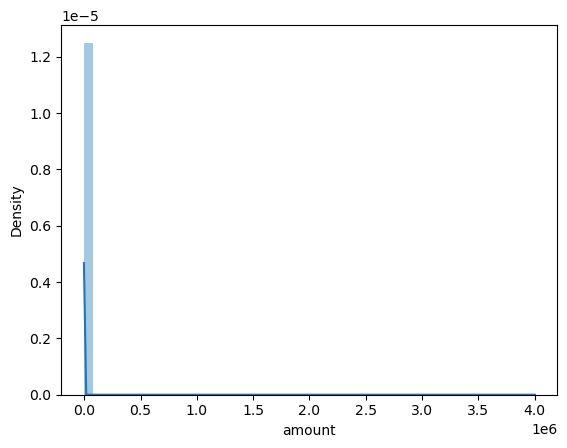

In [55]:
sns.distplot(gifts['amount'])

In [56]:
gifts = gifts.sort_values(by=['amount'], ascending=False)

In [57]:
# Using tail() function to drop outliers
gifts = gifts.tail(-4)
gifts.head()

,donorID,campaignID,amount,date
21410,D102552,3785.0,5000.0,2014-05-03
172833,D128065,NaN,4000.0,2010-03-12
53184,D105960,NaN,3718.4,2004-11-16
184130,D131307,NaN,3600.0,2012-11-12
210918,D142006,NaN,3198.0,2016-02-10


In [58]:
Q3 = gifts['amount'].quantile(0.99999999)
Q3

4997.834109963151

In [59]:
Q1 = gifts['amount'].quantile(0.00000001)
Q1

0.0

In [60]:
gifts = gifts[(gifts['amount']< 4997.83) | (gifts['amount'] >= 0.0)]

In [61]:
gifts['amount'].describe()

count    216590.000000
mean         27.396852
std          41.982500
min           0.000000
25%          10.000000
50%          24.790000
75%          32.000000
max        5000.000000
Name: amount, dtype: float64

### Dependant Variable Creation

In [62]:
gifts['Over_30_Camp6169'] = (gifts['campaignID'] == 6169) & (gifts['amount'] > 30) & (gifts['date'] < '2018-10-04')
gifts['Over_30_Camp7244'] = (gifts['campaignID'] == 7244) & (gifts['amount'] > 30) & (gifts['date'] < '2019-07-18')

In [63]:
gifts['Over_30_Camp6169'].value_counts()

Over_30_Camp6169
False    215850
True        740
Name: count, dtype: int64

In [64]:
gifts['Over_30_Camp7244'].value_counts()

Over_30_Camp7244
False    216379
True        211
Name: count, dtype: int64

### split gifts into test and train

In [65]:
giftstr=gifts[(gifts['date'] < '2018-09-04') & (gifts['date'] > '2013-09-04')]
giftsts=gifts[(gifts['date'] < '2019-06-18') & (gifts['date'] > '2014-06-18')]
giftsf=gifts[(gifts['date'] < '2020-02-01') & (gifts['date'] > '2015-02-01')]

In [66]:
#To be used in the training set:
#Creating count of gifts per donor
giftstr['n_gifts_camp6169'] = giftstr.groupby('donorID')['donorID'].transform('count')
#Creating sum of gift amount per donor
giftstr['sum_gifts_camp6169']=giftstr.groupby('donorID')['amount'].transform('sum')
#Creating avg. gift amount per donor
giftstr['avg_gifts_camp6169']=giftstr.groupby('donorID')['amount'].transform('mean')
#Creating max. gift amount per donor
giftstr['max_gifts_camp6169']=giftstr.groupby('donorID')['amount'].transform('max')
#Creating min. gift amount per donor
giftstr['min_gifts_camp6169']=giftstr.groupby('donorID')['amount'].transform('min')
#Find date of firt gift for all donors
giftstr['firstGift_camp6169'] = giftstr.groupby('donorID')['date'].transform('min')
#Find date of last gift for all donors
giftstr['lastGift_camp6169'] = giftstr.groupby('donorID')['date'].transform('max')
#Adding flag for donations over 30
giftstr['donation_over_30_camp6169'] = (giftstr['amount'] >= 30).astype(bool)


#To be used in the test set:
giftsts['n_gifts_camp7244'] = giftsts.groupby('donorID')['donorID'].transform('count')
#Creating sum of gift amount per donor
giftsts['sum_gifts_camp7244']=giftsts.groupby('donorID')['amount'].transform('sum')
#Creating avg. gift amount per donor
giftsts['avg_gifts_camp7244']=giftsts.groupby('donorID')['amount'].transform('mean')
#Creating max. gift amount per donor
giftsts['max_gifts_camp7244']=giftsts.groupby('donorID')['amount'].transform('max')
#Creating min. gift amount per donor
giftsts['min_gifts_camp7244']=giftsts.groupby('donorID')['amount'].transform('min')
#Find date of firt gift for all donors
giftsts['firstGift_camp7244'] = giftsts.groupby('donorID')['date'].transform('min')
#Find date of last gift for all donors
giftsts['lastGift_camp7244'] = giftsts.groupby('donorID')['date'].transform('max')
#Adding flag for donations over 30
giftsts['donation_over_30_camp7244'] = (giftsts['amount'] >= 30).astype(bool)

#to be used in prediction
giftsf['n_gifts_camp7362'] = giftsts.groupby('donorID')['donorID'].transform('count')
#Creating sum of gift amount per donor
giftsf['sum_gifts_camp7362']=giftsts.groupby('donorID')['amount'].transform('sum')
#Creating avg. gift amount per donor
giftsf['avg_gifts_camp7362']=giftsts.groupby('donorID')['amount'].transform('mean')
#Creating max. gift amount per donor
giftsf['max_gifts_camp7362']=giftsts.groupby('donorID')['amount'].transform('max')
#Creating min. gift amount per donor
giftsf['min_gifts_camp7362']=giftsts.groupby('donorID')['amount'].transform('min')
#Find date of firt gift for all donors
giftsf['firstGift_camp7362'] = giftsts.groupby('donorID')['date'].transform('min')
#Find date of last gift for all donors
giftsf['lastGift_camp7362'] = giftsts.groupby('donorID')['date'].transform('max')
#Adding flag for donations over 30
giftsf['donation_over_30_camp7362'] = (giftsts['amount'] >= 30).astype(bool)



C:\Users\cpirela\AppData\Local\Temp\ipykernel_24544\3580532609.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giftstr['n_gifts_camp6169'] = giftstr.groupby('donorID')['donorID'].transform('count')
C:\Users\cpirela\AppData\Local\Temp\ipykernel_24544\3580532609.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giftstr['sum_gifts_camp6169']=giftstr.groupby('donorID')['amount'].transform('sum')
C:\Users\cpirela\AppData\Local\Temp\ipykernel_24544\3580532609.py:7: SettingWithCopyWarning: 
A value is trying

C:\Users\cpirela\AppData\Local\Temp\ipykernel_24544\3580532609.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giftsf['lastGift_camp7362'] = giftsts.groupby('donorID')['date'].transform('max')
C:\Users\cpirela\AppData\Local\Temp\ipykernel_24544\3580532609.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  giftsf['donation_over_30_camp7362'] = (giftsts['amount'] >= 30).astype(bool)


In [67]:
#Test
gifts[gifts['donorID'] == 'D100023']

,donorID,campaignID,amount,date,Over_30_Camp6169,Over_30_Camp7244
132,D100023,6169.0,15.0,2018-09-15,False,False
134,D100023,7346.0,6.5,2019-09-07,False,False
133,D100023,7108.0,6.5,2019-04-10,False,False
131,D100023,4210.0,6.5,2015-10-20,False,False


In [68]:
giftstr[giftstr['donorID'] == 'D100023']

,donorID,campaignID,amount,date,Over_30_Camp6169,Over_30_Camp7244,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169
131,D100023,4210.0,6.5,2015-10-20,False,False,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False


In [69]:
giftstr[giftstr['donorID'] == 'D100023']

,donorID,campaignID,amount,date,Over_30_Camp6169,Over_30_Camp7244,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169
131,D100023,4210.0,6.5,2015-10-20,False,False,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False


In [70]:
x=gifts[['donorID','Over_30_Camp6169']]
x.reset_index()

,index,donorID,Over_30_Camp6169
0,21410,D102552,False
1,172833,D128065,False
2,53184,D105960,False
3,184130,D131307,False
4,210918,D142006,False
...,...,...,...
216585,172552,D128000,False
216586,78963,D109523,False
216587,6360,D100778,False
216588,30550,D103291,False


In [71]:
giftstr=pd.merge(giftstr,x,on='donorID')

In [72]:
giftstr= giftstr.drop(columns
            =['Over_30_Camp6169_x','Over_30_Camp7244'])

In [73]:
y=gifts[['donorID','Over_30_Camp7244']]
y.reset_index()

,index,donorID,Over_30_Camp7244
0,21410,D102552,False
1,172833,D128065,False
2,53184,D105960,False
3,184130,D131307,False
4,210918,D142006,False
...,...,...,...
216585,172552,D128000,False
216586,78963,D109523,False
216587,6360,D100778,False
216588,30550,D103291,False


In [74]:
giftsts=pd.merge(giftsts,y,on='donorID')

In [75]:
giftsts = giftsts.drop(columns=['Over_30_Camp7244_x','Over_30_Camp6169'])

In [76]:
giftsts.head()

,donorID,campaignID,amount,date,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y
0,D142006,NaN,3198.00,2016-02-10,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
1,D142006,NaN,3198.00,2016-02-10,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
2,D142006,4687.0,41.00,2017-06-26,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
3,D142006,4687.0,41.00,2017-06-26,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
4,D136501,6169.0,1430.61,2018-09-21,1,1430.61,1430.61,1430.61,1430.61,2018-09-21,2018-09-21,True,False


# Merging Tables Campaigns & Gifts

In [77]:
CampaignGiftstr = pd.merge(giftstr, campaigns, how='left', on='campaignID')

In [78]:
CampaignGiftstr = CampaignGiftstr.rename(columns={'date_x': 'gift_date', 'date_y': 'campaign_date'})
CampaignGiftstr

,donorID,campaignID,amount,gift_date,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y,campaign_date,lettersSent,CostUnit
0,D102552,3785.0,5000.00,2014-05-03,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN
1,D102552,3785.0,5000.00,2014-05-03,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN
2,D102552,3785.0,5000.00,2014-05-03,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN
3,D102552,3785.0,5000.00,2014-05-03,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN
4,D102552,3785.0,5000.00,2014-05-03,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704929,D109523,NaN,0.13,2014-10-12,8,3.51,0.43875,0.65,0.13,2014-02-21,2018-02-09,False,False,NaT,NaN,NaN
704930,D109523,NaN,0.13,2014-10-12,8,3.51,0.43875,0.65,0.13,2014-02-21,2018-02-09,False,False,NaT,NaN,NaN
704931,D109523,NaN,0.13,2014-10-12,8,3.51,0.43875,0.65,0.13,2014-02-21,2018-02-09,False,False,NaT,NaN,NaN
704932,D124744,5016.0,0.20,2017-10-31,1,0.20,0.20000,0.20,0.20,2017-10-31,2017-10-31,False,False,2017-10-27,8760.0,0.05


In [79]:
#created a new column visit_count and calculated no of visit
CampaignGiftstr['n_campaign_Camp6169'] = CampaignGiftstr[CampaignGiftstr['campaign_date'] < '2018-09-04'].groupby('donorID')['campaignID'].transform('count')

In [80]:
#Test
CampaignGiftstr[CampaignGiftstr['donorID'] == 'D100023']

,donorID,campaignID,amount,gift_date,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y,campaign_date,lettersSent,CostUnit,n_campaign_Camp6169
519073,D100023,4210.0,6.5,2015-10-20,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False,2015-10-18,24753.0,0.2,4.0
519074,D100023,4210.0,6.5,2015-10-20,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False,2015-10-18,24753.0,0.2,4.0
519075,D100023,4210.0,6.5,2015-10-20,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False,2015-10-18,24753.0,0.2,4.0
519076,D100023,4210.0,6.5,2015-10-20,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False,2015-10-18,24753.0,0.2,4.0


In [81]:
CampaignGiftstr.head()

,donorID,campaignID,amount,gift_date,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y,campaign_date,lettersSent,CostUnit,n_campaign_Camp6169
0,D102552,3785.0,5000.0,2014-05-03,2,5500.0,2750.0,5000.0,500.0,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN,NaN
1,D102552,3785.0,5000.0,2014-05-03,2,5500.0,2750.0,5000.0,500.0,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN,NaN
2,D102552,3785.0,5000.0,2014-05-03,2,5500.0,2750.0,5000.0,500.0,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN,NaN
3,D102552,3785.0,5000.0,2014-05-03,2,5500.0,2750.0,5000.0,500.0,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN,NaN
4,D102552,3785.0,5000.0,2014-05-03,2,5500.0,2750.0,5000.0,500.0,2014-05-03,2016-08-28,True,False,NaT,NaN,NaN,NaN


In [82]:
print(CampaignGiftstr.columns)

Index(['donorID', 'campaignID', 'amount', 'gift_date', 'n_gifts_camp6169',
       'sum_gifts_camp6169', 'avg_gifts_camp6169', 'max_gifts_camp6169',
       'min_gifts_camp6169', 'firstGift_camp6169', 'lastGift_camp6169',
       'donation_over_30_camp6169', 'Over_30_Camp6169_y', 'campaign_date',
       'lettersSent', 'CostUnit', 'n_campaign_Camp6169'],
      dtype='object')


In [83]:
CG_aggtr=CampaignGiftstr[['donorID','n_campaign_Camp6169','n_gifts_camp6169','sum_gifts_camp6169','avg_gifts_camp6169','max_gifts_camp6169','min_gifts_camp6169','firstGift_camp6169','lastGift_camp6169','donation_over_30_camp6169','Over_30_Camp6169_y']].copy()

In [84]:
CG_aggtr

,donorID,n_campaign_Camp6169,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y
0,D102552,NaN,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False
1,D102552,NaN,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False
2,D102552,NaN,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False
3,D102552,NaN,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False
4,D102552,NaN,2,5500.00,2750.00000,5000.00,500.00,2014-05-03,2016-08-28,True,False
...,...,...,...,...,...,...,...,...,...,...,...
704929,D109523,NaN,8,3.51,0.43875,0.65,0.13,2014-02-21,2018-02-09,False,False
704930,D109523,NaN,8,3.51,0.43875,0.65,0.13,2014-02-21,2018-02-09,False,False
704931,D109523,NaN,8,3.51,0.43875,0.65,0.13,2014-02-21,2018-02-09,False,False
704932,D124744,2.0,1,0.20,0.20000,0.20,0.20,2017-10-31,2017-10-31,False,False


In [85]:
CG_aggtr[CG_aggtr['donorID'] == 'D100023']

,donorID,n_campaign_Camp6169,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y
519073,D100023,4.0,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False
519074,D100023,4.0,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False
519075,D100023,4.0,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False
519076,D100023,4.0,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False


In [86]:
CG_aggtr=CG_aggtr[~CG_aggtr.duplicated(subset='donorID')]

In [87]:
CG_aggtr

,donorID,n_campaign_Camp6169,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y
0,D102552,NaN,2,5500.00,2750.000000,5000.00,500.00,2014-05-03,2016-08-28,True,False
18,D142006,NaN,2,3239.00,1619.500000,3198.00,41.00,2016-02-10,2017-06-26,True,False
22,D136803,NaN,2,2483.69,1241.845000,1483.69,1000.00,2014-04-13,2016-08-24,True,False
42,D113573,6.0,3,3250.00,1083.333333,1250.00,1000.00,2014-02-20,2017-02-13,True,False
51,D119166,NaN,3,2250.00,750.000000,1250.00,500.00,2014-04-26,2015-02-04,True,False
...,...,...,...,...,...,...,...,...,...,...,...
704520,D127651,6.0,1,1.30,1.300000,1.30,1.30,2017-07-19,2017-07-19,False,False
704526,D105284,NaN,4,4.00,1.000000,1.00,1.00,2014-02-20,2015-07-18,False,False
704606,D114463,14.0,1,1.00,1.000000,1.00,1.00,2017-03-29,2017-03-29,False,False
704620,D109523,NaN,8,3.51,0.438750,0.65,0.13,2014-02-21,2018-02-09,False,False


In [88]:
#Test
CG_aggtr[CG_aggtr['donorID'] == 'D100023']

,donorID,n_campaign_Camp6169,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y
519073,D100023,4.0,1,6.5,6.5,6.5,6.5,2015-10-20,2015-10-20,False,False


# Merging with Donor Table

In [89]:
Basetabletr = pd.merge(donors, CG_aggtr, how='left', on='donorID')

In [90]:
Basetabletr.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth,n_campaign_Camp6169,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y
0,D100001,1861,1,1,0,1,1967-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,D100002,2260,2,1,1,1,1952-01-14,1.0,1.0,20.0,20.0,20.0,20.0,2015-01-10,2015-01-10,False,False
2,D100003,1780,1,1,1,1,1986-12-23,60.0,5.0,18.0,3.6,5.0,3.0,2017-07-27,2018-07-08,False,False
3,D100004,1020,3,2,0,2,1952-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,D100005,1020,3,2,0,2,1986-06-25,10.0,2.0,10.0,5.0,5.0,5.0,2016-10-26,2018-06-19,False,False


# Creating TrainingSet

In [91]:
Camp6169=read_csv(inputData + "/selectioncampaign6169.csv")

In [92]:
Camp6169

,donorID
0,D100001
1,D100002
2,D100004
3,D100008
4,D100009
...,...
34883,D144686
34884,D144687
34885,D144689
34886,D144690


In [93]:
TrainingSet = pd.merge(Camp6169, Basetabletr , how='left', on='donorID')

In [94]:
train_date = datetime(2018, 9, 4)

# Function to calculate age
def calculate_age(birthdate, specific_date):
    return specific_date.year - birthdate.year - ((specific_date.month, specific_date.day) < (birthdate.month, birthdate.day))

# Calculate age for training data (as of 04/09/2018)
TrainingSet['age_train'] = TrainingSet['dateOfBirth'].apply(lambda x: calculate_age(x, train_date))

In [95]:
TrainingSet['LOR']= train_date - TrainingSet['firstGift_camp6169']

In [96]:
TrainingSet['LOR']= TrainingSet['LOR'].dt.days

In [97]:
TrainingSet['DaysLastGift']= train_date - TrainingSet['lastGift_camp6169']
TrainingSet['DaysLastGift']= TrainingSet['DaysLastGift'].dt.days

In [98]:
import numpy as np

Days=TrainingSet['DaysLastGift']
ThreeYears= Days  - 1095
OneYear= Days - 365
SixMonths= Days - 180

condition= Days != 0
TrainingSet.loc[condition, 'ThreeYears'] = ThreeYears
TrainingSet.loc[condition, 'OneYear'] = OneYear
TrainingSet.loc[condition, 'SixMonths'] = SixMonths

TrainingSet.loc[TrainingSet['ThreeYears'] > 0,'ThreeYears'] = 0
TrainingSet.loc[TrainingSet['OneYear'] > 0,'OneYear'] = 0
TrainingSet.loc[TrainingSet['SixMonths'] > 0,'SixMonths'] = 0

TrainingSet.loc[TrainingSet['ThreeYears'] < 0,'ThreeYears'] = 1
TrainingSet.loc[TrainingSet['OneYear'] < 0,'OneYear'] = 1
TrainingSet.loc[TrainingSet['SixMonths'] < 0,'SixMonths'] = 1

In [99]:
TrainingSet['n_campaign_Camp6169'] = TrainingSet['n_campaign_Camp6169'].fillna(0)
TrainingSet['n_gifts_camp6169'] = TrainingSet['n_gifts_camp6169'].fillna(0)
TrainingSet['sum_gifts_camp6169'] = TrainingSet['sum_gifts_camp6169'].fillna(0)
TrainingSet['avg_gifts_camp6169'] = TrainingSet['avg_gifts_camp6169'].fillna(0)
TrainingSet['max_gifts_camp6169'] = TrainingSet['max_gifts_camp6169'].fillna(0)
TrainingSet['min_gifts_camp6169'] = TrainingSet['min_gifts_camp6169'].fillna(0)
TrainingSet['firstGift_camp6169'] = TrainingSet['firstGift_camp6169'].fillna(0)
TrainingSet['lastGift_camp6169'] = TrainingSet['lastGift_camp6169'].fillna(0)
TrainingSet['donation_over_30_camp6169'] = TrainingSet['donation_over_30_camp6169'].fillna(0)
TrainingSet['Over_30_Camp6169_y'] = TrainingSet['Over_30_Camp6169_y'].fillna(0)
TrainingSet['LOR'] = TrainingSet['LOR'].fillna(0)
TrainingSet['DaysLastGift'] = TrainingSet['DaysLastGift'].fillna(0)
TrainingSet['ThreeYears'] = TrainingSet['ThreeYears'].fillna(0)
TrainingSet['OneYear'] = TrainingSet['OneYear'].fillna(0)
TrainingSet['SixMonths'] = TrainingSet['SixMonths'].fillna(0)

In [100]:
TrainingSet = TrainingSet.dropna(subset=['gender'])

In [101]:
TrainingSet.isnull().sum()

donorID                      0
zipcode                      0
province                     0
region                       0
gender                       0
language                     0
dateOfBirth                  0
n_campaign_Camp6169          0
n_gifts_camp6169             0
sum_gifts_camp6169           0
avg_gifts_camp6169           0
max_gifts_camp6169           0
min_gifts_camp6169           0
firstGift_camp6169           0
lastGift_camp6169            0
donation_over_30_camp6169    0
Over_30_Camp6169_y           0
age_train                    0
LOR                          0
DaysLastGift                 0
ThreeYears                   0
OneYear                      0
SixMonths                    0
dtype: int64

In [102]:
TrainingSet['DaysLastGift'].astype(int)

0           0
1        1333
2           0
3           0
4           0
         ... 
34883    1225
34884    1033
34885      71
34886    1344
34887    1006
Name: DaysLastGift, Length: 34874, dtype: int32

In [103]:
TrainingSet['zipcode']=TrainingSet['zipcode'].astype(int)
TrainingSet['province']=TrainingSet['province'].astype(int)
TrainingSet['region']=TrainingSet['region'].astype(int)
TrainingSet['gender']=TrainingSet['gender'].astype(int)
TrainingSet['language']=TrainingSet['language'].astype(int)
TrainingSet['n_campaign_Camp6169']=TrainingSet['n_campaign_Camp6169'].astype(int)
TrainingSet['n_gifts_camp6169']=TrainingSet['n_gifts_camp6169'].astype(int)
TrainingSet['n_campaign_Camp6169']=TrainingSet['n_campaign_Camp6169'].astype(int)
TrainingSet['n_campaign_Camp6169']=TrainingSet['n_campaign_Camp6169'].astype(int)

In [104]:
TrainingSet.dtypes

donorID                              object
zipcode                               int32
province                              int32
region                                int32
gender                                int32
language                              int32
dateOfBirth                  datetime64[ns]
n_campaign_Camp6169                   int32
n_gifts_camp6169                      int32
sum_gifts_camp6169                  float64
avg_gifts_camp6169                  float64
max_gifts_camp6169                  float64
min_gifts_camp6169                  float64
firstGift_camp6169                   object
lastGift_camp6169                    object
donation_over_30_camp6169            object
Over_30_Camp6169_y                   object
age_train                           float64
LOR                                 float64
DaysLastGift                        float64
ThreeYears                          float64
OneYear                             float64
SixMonths                       

In [105]:
bins= [0,10,20,30,40,50,60,float('inf')]
labels=[1,2,3,4,5,6,7]
TrainingSet['agegroup']= pd.cut(TrainingSet['age_train'],bins=bins,labels=labels,right=False)

In [106]:
bins= [0,1000,2000,3000,4000,5000,6000,float('inf')]
labels=[1,2,3,4,5,6,7]
TrainingSet['DaysLastgroup']= pd.cut(TrainingSet['DaysLastGift'],bins=bins,labels=labels,right=False)

In [107]:
bins= [0,1000,2000,3000,4000,5000,6000,float('inf')]
labels=[1,2,3,4,5,6,7]
TrainingSet['LORgroup']= pd.cut(TrainingSet['LOR'],bins=bins,labels=labels,right=False)

In [108]:
bins= [0,25,50,100,500,750,1000,float('inf')]
labels=[1,2,3,4,5,6,7]
TrainingSet['sum_giftsgroup']= pd.cut(TrainingSet['sum_gifts_camp6169'],bins=bins,labels=labels,right=False)

In [109]:
bins= [0,25,50,100,500,float('inf')]
labels=[1,2,3,4,5]
TrainingSet['avg_giftsgroup']= pd.cut(TrainingSet['avg_gifts_camp6169'],bins=bins,labels=labels,right=False)

In [110]:
TrainingSet['max_gifts_camp6169']=TrainingSet['max_gifts_camp6169'].round().astype(int)
TrainingSet['min_gifts_camp6169']=TrainingSet['min_gifts_camp6169'].round().astype(int)

In [111]:
TrainingSet['sum_giftsgroup'].value_counts()

sum_giftsgroup
1    27828
2     4089
3     1965
4      953
5       22
7       10
6        7
Name: count, dtype: int64

In [112]:
TrainingSet['agegroup']=TrainingSet['agegroup'].astype(int)
TrainingSet['LORgroup']=TrainingSet['LORgroup'].astype(int)
TrainingSet['DaysLastgroup']=TrainingSet['DaysLastgroup'].astype(int)
TrainingSet['sum_giftsgroup']=TrainingSet['sum_giftsgroup'].astype(int)
TrainingSet['avg_giftsgroup']=TrainingSet['avg_giftsgroup'].astype(int)
TrainingSet['Over_30_Camp6169_y']=TrainingSet['Over_30_Camp6169_y'].astype(int)

In [113]:
TrainingSet['Over_30_Camp6169_y'].value_counts()

Over_30_Camp6169_y
0    34596
1      278
Name: count, dtype: int64

In [114]:
pd.set_option('display.max_columns', None)
TrainingSet

,donorID,zipcode,province,region,gender,language,dateOfBirth,n_campaign_Camp6169,n_gifts_camp6169,sum_gifts_camp6169,avg_gifts_camp6169,max_gifts_camp6169,min_gifts_camp6169,firstGift_camp6169,lastGift_camp6169,donation_over_30_camp6169,Over_30_Camp6169_y,age_train,LOR,DaysLastGift,ThreeYears,OneYear,SixMonths,agegroup,DaysLastgroup,LORgroup,sum_giftsgroup,avg_giftsgroup
0,D100001,1861,1,1,0,1,1967-12-24,0,0,0.0,0.0,0,0,0,0,0,0,50.0,0.0,0.0,0.0,0.0,0.0,6,1,1,1,1
1,D100002,2260,2,1,1,1,1952-01-14,1,1,20.0,20.0,20,20,2015-01-10 00:00:00,2015-01-10 00:00:00,False,0,66.0,1333.0,1333.0,0.0,0.0,0.0,7,2,2,1,1
2,D100004,1020,3,2,0,2,1952-03-29,0,0,0.0,0.0,0,0,0,0,0,0,66.0,0.0,0.0,0.0,0.0,0.0,7,1,1,1,1
3,D100008,1780,1,1,1,2,1937-08-30,0,0,0.0,0.0,0,0,0,0,0,0,81.0,0.0,0.0,0.0,0.0,0.0,7,1,1,1,1
4,D100009,1020,3,2,1,2,1932-01-20,0,0,0.0,0.0,0,0,0,0,0,0,86.0,0.0,0.0,0.0,0.0,0.0,7,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34883,D144686,2440,2,1,0,1,1964-09-28,1,1,50.0,50.0,50,50,2015-04-28 00:00:00,2015-04-28 00:00:00,True,0,53.0,1225.0,1225.0,0.0,0.0,0.0,6,2,2,3,3
34884,D144687,4900,7,3,1,2,1970-09-12,1,1,10.0,10.0,10,10,2015-11-06 00:00:00,2015-11-06 00:00:00,False,0,47.0,1033.0,1033.0,1.0,0.0,0.0,5,2,2,1,1
34885,D144689,3061,1,1,1,1,1967-04-21,4,1,100.0,100.0,100,100,2018-06-25 00:00:00,2018-06-25 00:00:00,True,0,51.0,71.0,71.0,1.0,1.0,1.0,6,1,1,4,4
34886,D144690,1950,1,1,1,2,1976-05-07,1,1,40.0,40.0,40,40,2014-12-30 00:00:00,2014-12-30 00:00:00,True,0,42.0,1344.0,1344.0,0.0,0.0,0.0,5,2,2,2,2


# Pearson Analysis

In [115]:
TrainingSet.rename(columns={'donation_over_30_camp6169': 'donation_over_30','n_gifts_camp6169':'n_gifts','Over_30_Camp6169_y':'prediction'}, inplace=True)

In [116]:
selectedFeatures = []
target = "prediction"

for column in TrainingSet.columns:
    if column not in ("max_gifts_camp6169","sum_giftsgroup","min_gifts_camp6169", "donorID","dateOfBirth","campaignID","firstGift_camp6169","lastGift_camp6169","prediction",'sum_gifts_camp6169', 'avg_gifts_camp6169','age_train', 'LOR','DaysLastGift'):
        (pearson,pvalue) = pearsonr(TrainingSet[column],TrainingSet[target])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

zipcode - p-vlue = 0.5230698160069742 - selected : 0
province - p-vlue = 0.43819828193697835 - selected : 0
region - p-vlue = 0.3872628517819425 - selected : 0
gender - p-vlue = 4.764132366382374e-27 - selected : 1
language - p-vlue = 0.9867709901598842 - selected : 0
n_campaign_Camp6169 - p-vlue = 0.4741682697610592 - selected : 0
n_gifts - p-vlue = 9.669627994569514e-23 - selected : 1
donation_over_30 - p-vlue = 1.5820086329649084e-142 - selected : 1
ThreeYears - p-vlue = 1.5608455801404401e-07 - selected : 1
OneYear - p-vlue = 0.22129095383210134 - selected : 0
SixMonths - p-vlue = 0.27407200841313273 - selected : 0
agegroup - p-vlue = 1.0549308978187383e-25 - selected : 1
DaysLastgroup - p-vlue = 1.5945076612829814e-128 - selected : 1
LORgroup - p-vlue = 6.502303097667275e-134 - selected : 1
avg_giftsgroup - p-vlue = 8.585010274972293e-178 - selected : 1


In [117]:
selectedFeatures

['gender',
 'n_gifts',
 'donation_over_30',
 'ThreeYears',
 'agegroup',
 'DaysLastgroup',
 'LORgroup',
 'avg_giftsgroup']

In [118]:
#selectedFeatures.append('province')
selectedFeatures.append('language')
selectedFeatures.append('OneYear')
selectedFeatures.append('zipcode')
#selectedFeatures.append('SixMonths')

In [119]:
selectedFeatures = sorted(selectedFeatures)     

In [120]:
TrainingSet[selectedFeatures].dtypes

DaysLastgroup         int32
LORgroup              int32
OneYear             float64
ThreeYears          float64
agegroup              int32
avg_giftsgroup        int32
donation_over_30     object
gender                int32
language              int32
n_gifts               int32
zipcode               int32
dtype: object

# Running the model for the Training Set

In [121]:
import sys
import sklearn

from pandas                 import DataFrame
from pandas                 import read_csv
from numpy                  import array
from numpy                  import random
from sklearn.linear_model   import LogisticRegression
from sklearn.tree           import DecisionTreeClassifier
from sklearn.ensemble       import RandomForestClassifier
from sklearn.ensemble       import GradientBoostingClassifier
from sklearn.svm            import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors      import KNeighborsClassifier
from sklearn.metrics        import accuracy_score
from sklearn.metrics        import auc
from sklearn.metrics        import roc_auc_score
from matplotlib             import pyplot
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, accuracy_score
import kds

In [122]:
tree         = DecisionTreeClassifier(class_weight='balanced')
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 800,class_weight='balanced')
randomForest = RandomForestClassifier(n_estimators = 100,class_weight='balanced')
boostedTree  = GradientBoostingClassifier()
#svm          = SVC(gamma = "scale", probability = True,class_weight='balanced')
neuralNet    = MLPClassifier(max_iter = 800)
neighbors    = KNeighborsClassifier()

In [123]:
models = {#"tree"         :tree,
          #"logistic"     :logistic,
          "randomForest" :randomForest,
         #"boostedTree"  :boostedTree,
          #"svm"          :svm,
          #"neuralNet"    :neuralNet,
         #"neighbors"    :neighbors
         }

In [124]:
features=selectedFeatures

In [125]:
for model in models:
    models[model].fit(TrainingSet[features],TrainingSet[target])
    print(f"{model} has been trained successfully")

randomForest has been trained successfully


In [126]:
performances = {}

for model in models:
    predictions   = models[model].predict(TrainingSet[features])
    probabilities = DataFrame(models[model].predict_proba(TrainingSet[features]))[1]
    accuracy      = accuracy_score(TrainingSet[target],predictions)
    auc           = roc_auc_score(array(TrainingSet[target]),array(probabilities))
    
    performances[model] = {"Accuracy":accuracy,"AUC":auc}

In [127]:
DataFrame(performances)

,randomForest
AUC,0.998624
Accuracy,0.996760


In [128]:
alice=probabilities


In [129]:
alice.value_counts()


1
0.000000    32901
0.010000      567
0.020000      212
0.030000      114
0.040000       67
            ...  
0.238050        1
0.059524        1
0.159204        1
0.029960        1
0.019736        1
Name: count, Length: 313, dtype: int64

In [130]:
vishnu=predictions


In [131]:
carlos=np.count_nonzero(vishnu == 1)
carlos

391

# Creating Test Basetable: Merging Tables Campaigns and Giftsts

In [132]:
CampaignGiftsts = pd.merge(giftsts, campaigns, how='left', on='campaignID')

In [133]:
CampaignGiftsts = CampaignGiftsts.rename(columns={'date_x': 'gift_date', 'date_y': 'campaign_date'})
CampaignGiftsts

,donorID,campaignID,amount,gift_date,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y,campaign_date,lettersSent,CostUnit
0,D142006,NaN,3198.00,2016-02-10,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,NaT,NaN,NaN
1,D142006,NaN,3198.00,2016-02-10,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,NaT,NaN,NaN
2,D142006,4687.0,41.00,2017-06-26,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,2017-06-23,31342.0,0.58
3,D142006,4687.0,41.00,2017-06-26,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,2017-06-23,31342.0,0.58
4,D136501,6169.0,1430.61,2018-09-21,1,1430.61,1430.61,1430.61,1430.61,2018-09-21,2018-09-21,True,False,2018-09-04,34888.0,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569205,D114463,4681.0,1.00,2017-03-29,1,1.00,1.00,1.00,1.00,2017-03-29,2017-03-29,False,False,2017-03-20,25570.0,0.31
569206,D114463,4681.0,1.00,2017-03-29,1,1.00,1.00,1.00,1.00,2017-03-29,2017-03-29,False,False,2017-03-20,25570.0,0.31
569207,D114463,4681.0,1.00,2017-03-29,1,1.00,1.00,1.00,1.00,2017-03-29,2017-03-29,False,False,2017-03-20,25570.0,0.31
569208,D124744,5016.0,0.20,2017-10-31,1,0.20,0.20,0.20,0.20,2017-10-31,2017-10-31,False,False,2017-10-27,8760.0,0.05


In [134]:
#created a new column visit_count and calculated no of visit
CampaignGiftsts['n_campaign_Camp7244'] = CampaignGiftsts[CampaignGiftsts['campaign_date'] < '2019-06-18'].groupby('donorID')['campaignID'].transform('count')

In [135]:
#Test
CampaignGiftsts[CampaignGiftsts['donorID'] == 'D100023']

,donorID,campaignID,amount,gift_date,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y,campaign_date,lettersSent,CostUnit,n_campaign_Camp7244
316284,D100023,6169.0,15.0,2018-09-15,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2018-09-04,34888.0,0.87,12.0
316285,D100023,6169.0,15.0,2018-09-15,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2018-09-04,34888.0,0.87,12.0
316286,D100023,6169.0,15.0,2018-09-15,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2018-09-04,34888.0,0.87,12.0
316287,D100023,6169.0,15.0,2018-09-15,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2018-09-04,34888.0,0.87,12.0
316288,D100023,7108.0,6.5,2019-04-10,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2019-04-01,25914.0,0.46,12.0
316289,D100023,7108.0,6.5,2019-04-10,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2019-04-01,25914.0,0.46,12.0
316290,D100023,7108.0,6.5,2019-04-10,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2019-04-01,25914.0,0.46,12.0
316291,D100023,7108.0,6.5,2019-04-10,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2019-04-01,25914.0,0.46,12.0
316292,D100023,4210.0,6.5,2015-10-20,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2015-10-18,24753.0,0.20,12.0
316293,D100023,4210.0,6.5,2015-10-20,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False,2015-10-18,24753.0,0.20,12.0


In [136]:
CampaignGiftsts.head()

,donorID,campaignID,amount,gift_date,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y,campaign_date,lettersSent,CostUnit,n_campaign_Camp7244
0,D142006,NaN,3198.00,2016-02-10,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,NaT,NaN,NaN,NaN
1,D142006,NaN,3198.00,2016-02-10,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,NaT,NaN,NaN,NaN
2,D142006,4687.0,41.00,2017-06-26,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,2017-06-23,31342.0,0.58,2.0
3,D142006,4687.0,41.00,2017-06-26,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False,2017-06-23,31342.0,0.58,2.0
4,D136501,6169.0,1430.61,2018-09-21,1,1430.61,1430.61,1430.61,1430.61,2018-09-21,2018-09-21,True,False,2018-09-04,34888.0,0.87,2.0


In [137]:
print(CampaignGiftsts.columns)

Index(['donorID', 'campaignID', 'amount', 'gift_date', 'n_gifts_camp7244',
       'sum_gifts_camp7244', 'avg_gifts_camp7244', 'max_gifts_camp7244',
       'min_gifts_camp7244', 'firstGift_camp7244', 'lastGift_camp7244',
       'donation_over_30_camp7244', 'Over_30_Camp7244_y', 'campaign_date',
       'lettersSent', 'CostUnit', 'n_campaign_Camp7244'],
      dtype='object')


In [138]:
CG_aggts=CampaignGiftsts[['donorID','n_campaign_Camp7244', 'n_gifts_camp7244',
       'sum_gifts_camp7244', 'avg_gifts_camp7244', 'max_gifts_camp7244',
       'min_gifts_camp7244', 'firstGift_camp7244', 'lastGift_camp7244',
       'donation_over_30_camp7244', 'Over_30_Camp7244_y']].copy()

In [139]:
CG_aggts

,donorID,n_campaign_Camp7244,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y
0,D142006,NaN,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
1,D142006,NaN,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
2,D142006,2.0,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
3,D142006,2.0,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
4,D136501,2.0,1,1430.61,1430.61,1430.61,1430.61,2018-09-21,2018-09-21,True,False
...,...,...,...,...,...,...,...,...,...,...,...
569205,D114463,14.0,1,1.00,1.00,1.00,1.00,2017-03-29,2017-03-29,False,False
569206,D114463,14.0,1,1.00,1.00,1.00,1.00,2017-03-29,2017-03-29,False,False
569207,D114463,14.0,1,1.00,1.00,1.00,1.00,2017-03-29,2017-03-29,False,False
569208,D124744,2.0,1,0.20,0.20,0.20,0.20,2017-10-31,2017-10-31,False,False


In [140]:
#test
CG_aggts[CG_aggts['donorID'] == 'D100023']

,donorID,n_campaign_Camp7244,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y
316284,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316285,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316286,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316287,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316288,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316289,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316290,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316291,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316292,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False
316293,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False


In [141]:
CG_aggts=CG_aggts[~CG_aggts.duplicated(subset='donorID')]

In [142]:
CG_aggts

,donorID,n_campaign_Camp7244,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y
0,D142006,NaN,2,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,False
4,D136501,2.0,1,1430.61,1430.61,1430.61,1430.61,2018-09-21,2018-09-21,True,False
6,D113573,6.0,2,2250.00,1125.00,1250.00,1000.00,2015-01-31,2017-02-13,True,False
12,D119130,4.0,1,1000.00,1000.00,1000.00,1000.00,2017-07-23,2017-07-23,True,False
16,D136803,10.0,1,1000.00,1000.00,1000.00,1000.00,2016-08-24,2016-08-24,True,False
...,...,...,...,...,...,...,...,...,...,...,...
568908,D109523,156.0,6,3.84,0.64,1.50,0.13,2014-10-12,2018-09-07,False,False
569142,D105284,40.0,2,2.00,1.00,1.00,1.00,2015-05-11,2015-07-18,False,False
569182,D118586,12.0,1,1.00,1.00,1.00,1.00,2015-04-25,2015-04-25,False,False
569194,D114463,14.0,1,1.00,1.00,1.00,1.00,2017-03-29,2017-03-29,False,False


In [143]:
#Test
CG_aggts[CG_aggts['donorID'] == 'D100023']

,donorID,n_campaign_Camp7244,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y
316284,D100023,12.0,3,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,False


## Merging with Donor Table

In [144]:
Basetablets = pd.merge(donors, CG_aggts, how='left', on='donorID')
Basetablets

,donorID,zipcode,province,region,gender,language,dateOfBirth,n_campaign_Camp7244,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y
0,D100001,1861,1,1,0,1,1967-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
1,D100002,2260,2,1,1,1,1952-01-14,1.0,1.0,20.0,20.000000,20.0,20.0,2015-01-10,2015-01-10,False,False
2,D100003,1780,1,1,1,1,1986-12-23,144.0,12.0,46.0,3.833333,5.0,3.0,2017-07-27,2019-06-17,False,False
3,D100004,1020,3,2,0,2,1952-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN
4,D100005,1020,3,2,0,2,1986-06-25,15.0,3.0,20.0,6.666667,10.0,5.0,2016-10-26,2019-04-18,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,D144687,4900,7,3,1,2,1970-09-12,1.0,1.0,10.0,10.000000,10.0,10.0,2015-11-06,2015-11-06,False,False
44687,D144688,3600,11,1,1,1,1972-11-28,7.0,1.0,15.0,15.000000,15.0,15.0,2017-07-27,2017-07-27,False,False
44688,D144689,3061,1,1,1,1,1967-04-21,8.0,2.0,200.0,100.000000,100.0,100.0,2018-06-25,2019-05-01,True,False
44689,D144690,1950,1,1,1,2,1976-05-07,1.0,1.0,40.0,40.000000,40.0,40.0,2014-12-30,2014-12-30,True,False


# Creating TestSet

In [145]:
Camp7244=read_csv(inputData + "/selectioncampaign7244.csv")

In [146]:
Camp7244

,donorID
0,D100001
1,D100002
2,D100008
3,D100009
4,D100010
...,...
25640,D144682
25641,D144683
25642,D144686
25643,D144690


In [147]:
TestSet = pd.merge(Camp7244, Basetablets , how='left', on='donorID')

In [148]:
test_date = datetime(2019, 6, 18)

# Function to calculate age
def calculate_age(birthdate, specific_date):
    return specific_date.year - birthdate.year - ((specific_date.month, specific_date.day) < (birthdate.month, birthdate.day))

# Calculate age for training data (as of 04/09/2018)
TestSet['age_test'] = TestSet['dateOfBirth'].apply(lambda x: calculate_age(x, test_date))

In [149]:
TestSet['LOR']= test_date - TestSet['firstGift_camp7244']

In [150]:
TestSet['LOR']= TestSet['LOR'].dt.days

In [151]:
TestSet['DaysLastGift']= test_date - TestSet['lastGift_camp7244']

In [152]:
TestSet['DaysLastGift']= TestSet['DaysLastGift'].dt.days

In [153]:
import numpy as np

Days=TestSet['DaysLastGift']
ThreeYears= Days  - 1095
OneYear= Days - 365
SixMonths= Days - 180

condition= Days != 0
TestSet.loc[condition, 'ThreeYears'] = ThreeYears
TestSet.loc[condition, 'OneYear'] = OneYear
TestSet.loc[condition, 'SixMonths'] = SixMonths

TestSet.loc[TestSet['ThreeYears'] > 0,'ThreeYears'] = 0
TestSet.loc[TestSet['OneYear'] > 0,'OneYear'] = 0
TestSet.loc[TestSet['SixMonths'] > 0,'SixMonths'] = 0

TestSet.loc[TestSet['ThreeYears'] < 0,'ThreeYears'] = 1
TestSet.loc[TestSet['OneYear'] < 0,'OneYear'] = 1
TestSet.loc[TestSet['SixMonths'] < 0,'SixMonths'] = 1

In [154]:
TestSet['n_campaign_Camp7244'] = TestSet['n_campaign_Camp7244'].fillna(0)
TestSet['n_gifts_camp7244'] = TestSet['n_gifts_camp7244'].fillna(0)
TestSet['sum_gifts_camp7244'] = TestSet['sum_gifts_camp7244'].fillna(0)
TestSet['avg_gifts_camp7244'] = TestSet['avg_gifts_camp7244'].fillna(0)
TestSet['max_gifts_camp7244'] = TestSet['max_gifts_camp7244'].fillna(0)
TestSet['min_gifts_camp7244'] = TestSet['min_gifts_camp7244'].fillna(0)
TestSet['firstGift_camp7244'] = TestSet['firstGift_camp7244'].fillna(0)
TestSet['lastGift_camp7244'] = TestSet['lastGift_camp7244'].fillna(0)
TestSet['donation_over_30_camp7244'] = TestSet['donation_over_30_camp7244'].fillna(0)
TestSet['Over_30_Camp7244_y'] = TestSet['Over_30_Camp7244_y'].fillna(0)
TestSet['LOR'] = TestSet['LOR'].fillna(0)
TestSet['DaysLastGift'] = TestSet['DaysLastGift'].fillna(0)
TestSet['ThreeYears'] = TestSet['ThreeYears'].fillna(0)
TestSet['OneYear'] = TestSet['OneYear'].fillna(0)
TestSet['SixMonths'] = TestSet['SixMonths'].fillna(0)

In [155]:
TestSet = TestSet.dropna(subset=['gender'])

In [156]:
TestSet.isnull().sum()

donorID                      0
zipcode                      0
province                     0
region                       0
gender                       0
language                     0
dateOfBirth                  0
n_campaign_Camp7244          0
n_gifts_camp7244             0
sum_gifts_camp7244           0
avg_gifts_camp7244           0
max_gifts_camp7244           0
min_gifts_camp7244           0
firstGift_camp7244           0
lastGift_camp7244            0
donation_over_30_camp7244    0
Over_30_Camp7244_y           0
age_test                     0
LOR                          0
DaysLastGift                 0
ThreeYears                   0
OneYear                      0
SixMonths                    0
dtype: int64

In [157]:
TestSet['DaysLastGift'].astype(int)

0           0
1        1620
2           0
3           0
4        1617
         ... 
25640    1042
25641    1346
25642    1512
25643    1631
25644    1293
Name: DaysLastGift, Length: 25645, dtype: int32

In [158]:
TestSet['zipcode']=TestSet['zipcode'].astype(int)
TestSet['province']=TestSet['province'].astype(int)
TestSet['region']=TestSet['region'].astype(int)
TestSet['gender']=TestSet['gender'].astype(int)
TestSet['language']=TestSet['language'].astype(int)
TestSet['n_campaign_Camp7244']=TestSet['n_campaign_Camp7244'].astype(int)
TestSet['n_gifts_camp7244']=TestSet['n_gifts_camp7244'].astype(int)
TestSet['n_campaign_Camp7244']=TestSet['n_campaign_Camp7244'].astype(int)
TestSet['n_campaign_Camp7244']=TestSet['n_campaign_Camp7244'].astype(int)

In [159]:
TestSet.dtypes

donorID                              object
zipcode                               int32
province                              int32
region                                int32
gender                                int32
language                              int32
dateOfBirth                  datetime64[ns]
n_campaign_Camp7244                   int32
n_gifts_camp7244                      int32
sum_gifts_camp7244                  float64
avg_gifts_camp7244                  float64
max_gifts_camp7244                  float64
min_gifts_camp7244                  float64
firstGift_camp7244                   object
lastGift_camp7244                    object
donation_over_30_camp7244            object
Over_30_Camp7244_y                   object
age_test                              int64
LOR                                 float64
DaysLastGift                        float64
ThreeYears                          float64
OneYear                             float64
SixMonths                       

In [160]:
bins= [0,10,20,30,40,50,60,float('inf')]
labels=[1,2,3,4,5,6,7]
TestSet['agegroup']= pd.cut(TestSet['age_test'],bins=bins,labels=labels,right=False)

In [161]:
bins= [0,1000,2000,3000,4000,5000,6000,float('inf')]
labels=[1,2,3,4,5,6,7]
TestSet['DaysLastgroup']= pd.cut(TestSet['DaysLastGift'],bins=bins,labels=labels,right=False)

In [162]:
bins= [0,1000,2000,3000,4000,5000,6000,float('inf')]
labels=[1,2,3,4,5,6,7]
TestSet['LORgroup']= pd.cut(TestSet['LOR'],bins=bins,labels=labels,right=False)

In [163]:
bins= [0,25,50,100,500,750,1000,float('inf')]
labels=[1,2,3,4,5,6,7]
TestSet['sum_giftsgroup']= pd.cut(TestSet['sum_gifts_camp7244'],bins=bins,labels=labels,right=False)

In [164]:
bins= [0,25,50,100,500,float('inf')]
labels=[1,2,3,4,5]
TestSet['avg_giftsgroup']= pd.cut(TestSet['avg_gifts_camp7244'],bins=bins,labels=labels,right=False)

In [165]:
TestSet['max_gifts_camp7244']=TestSet['max_gifts_camp7244'].round().astype(int)
TestSet['min_gifts_camp7244']=TestSet['min_gifts_camp7244'].round().astype(int)

In [166]:
TestSet['sum_giftsgroup'].value_counts()

sum_giftsgroup
1    20514
2     3349
3     1244
4      520
5        9
7        5
6        4
Name: count, dtype: int64

In [167]:
TestSet['agegroup']=TestSet['agegroup'].astype(int)
TestSet['LORgroup']=TestSet['LORgroup'].astype(int)
TestSet['DaysLastgroup']=TestSet['DaysLastgroup'].astype(int)
TestSet['sum_giftsgroup']=TestSet['sum_giftsgroup'].astype(int)
TestSet['avg_giftsgroup']=TestSet['avg_giftsgroup'].astype(int)
TestSet['Over_30_Camp7244_y']=TestSet['Over_30_Camp7244_y'].astype(int)

In [168]:
TestSet['Over_30_Camp7244_y'].value_counts()

Over_30_Camp7244_y
0    25575
1       70
Name: count, dtype: int64

In [169]:
pd.set_option('display.max_columns', None)
TestSet

,donorID,zipcode,province,region,gender,language,dateOfBirth,n_campaign_Camp7244,n_gifts_camp7244,sum_gifts_camp7244,avg_gifts_camp7244,max_gifts_camp7244,min_gifts_camp7244,firstGift_camp7244,lastGift_camp7244,donation_over_30_camp7244,Over_30_Camp7244_y,age_test,LOR,DaysLastGift,ThreeYears,OneYear,SixMonths,agegroup,DaysLastgroup,LORgroup,sum_giftsgroup,avg_giftsgroup
0,D100001,1861,1,1,0,1,1967-12-24,0,0,0.0,0.0,0,0,0,0,0,0,51,0.0,0.0,0.0,0.0,0.0,6,1,1,1,1
1,D100002,2260,2,1,1,1,1952-01-14,1,1,20.0,20.0,20,20,2015-01-10 00:00:00,2015-01-10 00:00:00,False,0,67,1620.0,1620.0,0.0,0.0,0.0,7,2,2,1,1
2,D100008,1780,1,1,1,2,1937-08-30,0,0,0.0,0.0,0,0,0,0,0,0,81,0.0,0.0,0.0,0.0,0.0,7,1,1,1,1
3,D100009,1020,3,2,1,2,1932-01-20,0,0,0.0,0.0,0,0,0,0,0,0,87,0.0,0.0,0.0,0.0,0.0,7,1,1,1,1
4,D100010,1020,3,2,1,2,1983-05-30,1,1,40.0,40.0,40,40,2015-01-13 00:00:00,2015-01-13 00:00:00,True,0,36,1617.0,1617.0,0.0,0.0,0.0,4,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25640,D144682,1640,1,1,1,2,1982-08-29,1,1,40.0,40.0,40,40,2016-08-10 00:00:00,2016-08-10 00:00:00,True,0,36,1042.0,1042.0,1.0,0.0,0.0,4,2,2,2,2
25641,D144683,9308,6,1,1,1,1985-06-15,0,1,50.0,50.0,50,50,2015-10-11 00:00:00,2015-10-11 00:00:00,True,0,34,1346.0,1346.0,0.0,0.0,0.0,4,2,2,3,3
25642,D144686,2440,2,1,0,1,1964-09-28,1,1,50.0,50.0,50,50,2015-04-28 00:00:00,2015-04-28 00:00:00,True,0,54,1512.0,1512.0,0.0,0.0,0.0,6,2,2,3,3
25643,D144690,1950,1,1,1,2,1976-05-07,1,1,40.0,40.0,40,40,2014-12-30 00:00:00,2014-12-30 00:00:00,True,0,43,1631.0,1631.0,0.0,0.0,0.0,5,2,2,2,2


# Pearson Analysis on Test Set

In [170]:
TestSet.rename(columns={'donation_over_30_camp7244': 'donation_over_30','n_gifts_camp7244':'n_gifts','Over_30_Camp7244_y':'prediction'}, inplace=True)

In [171]:
TestSet.columns

Index(['donorID', 'zipcode', 'province', 'region', 'gender', 'language',
       'dateOfBirth', 'n_campaign_Camp7244', 'n_gifts', 'sum_gifts_camp7244',
       'avg_gifts_camp7244', 'max_gifts_camp7244', 'min_gifts_camp7244',
       'firstGift_camp7244', 'lastGift_camp7244', 'donation_over_30',
       'prediction', 'age_test', 'LOR', 'DaysLastGift', 'ThreeYears',
       'OneYear', 'SixMonths', 'agegroup', 'DaysLastgroup', 'LORgroup',
       'sum_giftsgroup', 'avg_giftsgroup'],
      dtype='object')

In [172]:
selectedFeaturesTest = []
targetts = "prediction"

for column in TestSet.columns:
    if column not in ("max_gifts_camp7244","sum_giftsgroup","min_gifts_camp7244","donorID","dateOfBirth","campaignID","firstGift_camp7244","lastGift_camp7244","prediction", 'sum_gifts_camp7244', 'avg_gifts_camp7244','age_train', 'LOR','DaysLastGift'):
        (pearson,pvalue) = pearsonr(TestSet[column],TestSet[targetts])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeaturesTest.append(column)

zipcode - p-vlue = 0.22683623864907904 - selected : 0
province - p-vlue = 0.30613463374186606 - selected : 0
region - p-vlue = 0.08386757325373817 - selected : 0
gender - p-vlue = 0.006399034331179459 - selected : 0
language - p-vlue = 0.25684864328485574 - selected : 0
n_campaign_Camp7244 - p-vlue = 0.09843356064583621 - selected : 0
n_gifts - p-vlue = 1.9361430127026753e-10 - selected : 1
donation_over_30 - p-vlue = 7.639496863949823e-39 - selected : 1
age_test - p-vlue = 0.015941755873143195 - selected : 0
ThreeYears - p-vlue = 1.6774603408278166e-17 - selected : 1
OneYear - p-vlue = 0.0013705333274792112 - selected : 0
SixMonths - p-vlue = 0.0012288874228720585 - selected : 0
agegroup - p-vlue = 0.06743107994028363 - selected : 0
DaysLastgroup - p-vlue = 1.4480563359648988e-22 - selected : 1
LORgroup - p-vlue = 1.435043509184696e-30 - selected : 1
avg_giftsgroup - p-vlue = 1.8308465976223823e-33 - selected : 1


In [173]:
selectedFeaturesTest.append('gender')
selectedFeaturesTest.append('agegroup')
#selectedFeaturesTest.append('province')
selectedFeaturesTest.append('language')
selectedFeaturesTest.append('OneYear')
selectedFeaturesTest.append('zipcode')
#selectedFeaturesTest.append('SixMonths')

In [174]:
selectedFeaturesTest = sorted(selectedFeaturesTest)     

# Running the model for Test Set

In [175]:
tree         = DecisionTreeClassifier(class_weight='balanced')
logistic     = LogisticRegression(solver = "lbfgs", max_iter = 800,class_weight='balanced')
randomForest = RandomForestClassifier(n_estimators = 100,class_weight='balanced')
boostedTree  = GradientBoostingClassifier()
#svm          = SVC(gamma = "scale", probability = True,class_weight='balanced')
neuralNet    = MLPClassifier(max_iter = 800)
neighbors    = KNeighborsClassifier()

In [176]:
models = {#"tree"         :tree,
          #"logistic"     :logistic,
          "randomForest" :randomForest,
        #  "boostedTree"  :boostedTree,
          #"svm"          :svm,
         # "neuralNet"    :neuralNet,
         # "neighbors"    :neighbors
         }

In [177]:
featurests=selectedFeaturesTest

In [178]:
for model in models:
    models[model].fit(TestSet[featurests],TestSet[targetts])
    print(f"{model} has been trained successfully")

randomForest has been trained successfully


In [179]:
performancests = {}

for model in models:
    predictionsts   = models[model].predict(TestSet[featurests])
    probabilitiests = DataFrame(models[model].predict_proba(TestSet[featurests]))[1]
    accuracy_test      = accuracy_score(TestSet[targetts],predictionsts)
    auc_test           = roc_auc_score(array(TestSet[targetts]),array(probabilitiests))
    
    performancests[model] = {"Accuracy":accuracy_test,"AUC":auc_test}

In [180]:
DataFrame(performancests)

,randomForest
AUC,0.999366
Accuracy,0.998908


In [181]:
alice=probabilitiests

In [182]:
alice.value_counts()

1
0.000000    24965
0.010000      235
0.020000       90
0.030000       40
0.040000       26
            ...  
0.309946        1
0.009955        1
0.039964        1
0.019982        1
0.109727        1
Name: count, Length: 141, dtype: int64

In [183]:
vishnu=predictionsts

In [184]:
carlos=np.count_nonzero(vishnu == 1)
carlos

98

In [185]:
targetts

'prediction'

In [186]:
target

'prediction'

In [187]:
selectedFeatures

['DaysLastgroup',
 'LORgroup',
 'OneYear',
 'ThreeYears',
 'agegroup',
 'avg_giftsgroup',
 'donation_over_30',
 'gender',
 'language',
 'n_gifts',
 'zipcode']

In [188]:
selectedFeaturesTest

['DaysLastgroup',
 'LORgroup',
 'OneYear',
 'ThreeYears',
 'agegroup',
 'avg_giftsgroup',
 'donation_over_30',
 'gender',
 'language',
 'n_gifts',
 'zipcode']

Training Set Accuracy: 99.68171130354992%
Test Set Accuracy: 99.22402027685709%


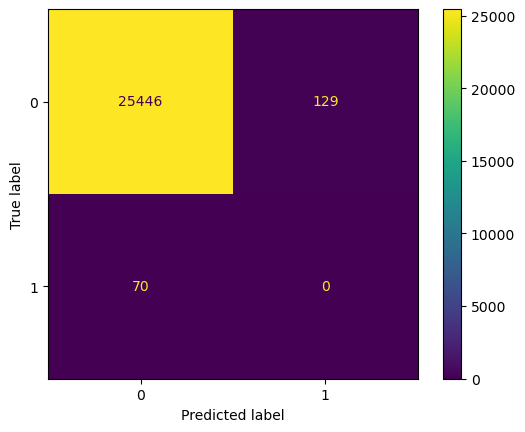

In [189]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'models' is a dictionary containing the RandomForest model
model = models["randomForest"]
model.fit(TrainingSet[features], TrainingSet[target])

# Make predictions
TrainingSet["predicted_donor_balanced"] = model.predict(TrainingSet[features])
TestSet["predicted_donor_balanced"] = model.predict(TestSet[featurests])  

# Calculate accuracy
accuracy_train = accuracy_score(TrainingSet['prediction'], TrainingSet['predicted_donor_balanced']) * 100
accuracy_test = accuracy_score(TestSet['prediction'], TestSet['predicted_donor_balanced']) * 100
print(f"Training Set Accuracy: {accuracy_train}%")
print(f"Test Set Accuracy: {accuracy_test}%")

# Plot a confusion matrix from the test set
cm = confusion_matrix(TestSet['prediction'], TestSet['predicted_donor_balanced'], labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [190]:
from pandas import DataFrame
from numpy import array, isnan
from sklearn.metrics import roc_auc_score

# Calculate probabilities
TrainingSet["proba churn"] = DataFrame(model.predict_proba(TrainingSet[features]))[1]
TestSet["proba churn"] = DataFrame(model.predict_proba(TestSet[featurests]))[1]  

# Handle NaN values 
TrainingSet = TrainingSet.dropna(subset=[target, "proba churn"])
TestSet = TestSet.dropna(subset=[targetts, "proba churn"])

# Calculate AUC scores
aucTraining = roc_auc_score(array(TrainingSet[target]), array(TrainingSet["proba churn"]))
aucTest = roc_auc_score(array(TestSet[targetts]), array(TestSet["proba churn"]))

print(f"auc training set: {aucTraining}")
print(f"auc test set: {aucTest}")

auc training set: 0.5200776051416112
auc test set: 0.6139282223153191


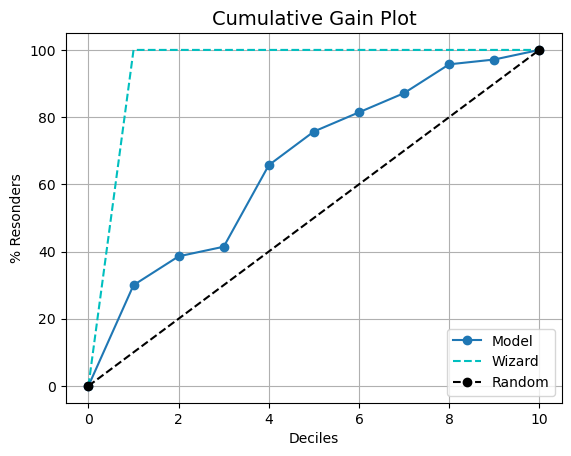

In [191]:
# CUMMULATIVE GAIN PLOT
kds.metrics.plot_cumulative_gain(TestSet["prediction"],TestSet["proba churn"])

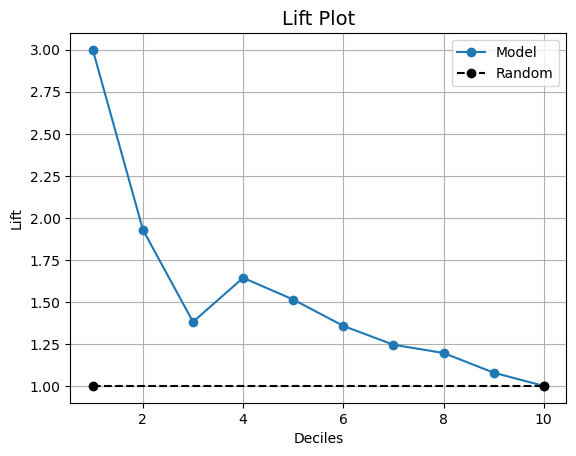

In [192]:
# LIFT PLOT
kds.metrics.plot_lift(TestSet["prediction"],TestSet["proba churn"])

In [193]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming 'models' is a dictionary containing the RandomForest model
model2 = models["logistic"]
model2.fit(TrainingSet[features], TrainingSet[target])

# Make predictions
TrainingSet["predicted_donor_balanced"] = model2.predict(TrainingSet[features])
TestSet["predicted_donor_balanced"] = model2.predict(TestSet[featurests]) 

# Calculate accuracy
accuracy_train = accuracy_score(TrainingSet['prediction'], TrainingSet['predicted_donor_balanced']) * 100
accuracy_test = accuracy_score(TestSet['prediction'], TestSet['predicted_donor_balanced']) * 100
print(f"Training Set Accuracy: {accuracy_train}%")
print(f"Test Set Accuracy: {accuracy_test}%")

# Plot a confusion matrix from the test set
cm = confusion_matrix(TestSet['prediction'], TestSet['predicted_donor_balanced'], labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot()

KeyError: 'logistic'

In [ ]:
# Calculate probabilities
TrainingSet["proba churn"] = DataFrame(model2.predict_proba(TrainingSet[features]))[1]
TestSet["proba churn"] = DataFrame(model2.predict_proba(TestSet[featurests]))[1]  

# Handle NaN values 
TrainingSet = TrainingSet.dropna(subset=[target, "proba churn"])
TestSet = TestSet.dropna(subset=[targetts, "proba churn"])

# Calculate AUC scores
aucTraining = roc_auc_score(array(TrainingSet[target]), array(TrainingSet["proba churn"]))
aucTest = roc_auc_score(array(TestSet[targetts]), array(TestSet["proba churn"]))

print(f"auc training set: {aucTraining}")
print(f"auc test set: {aucTest}")

In [ ]:
# CUMMULATIVE GAIN PLOT
kds.metrics.plot_cumulative_gain(TestSet["prediction"],TestSet["proba churn"])

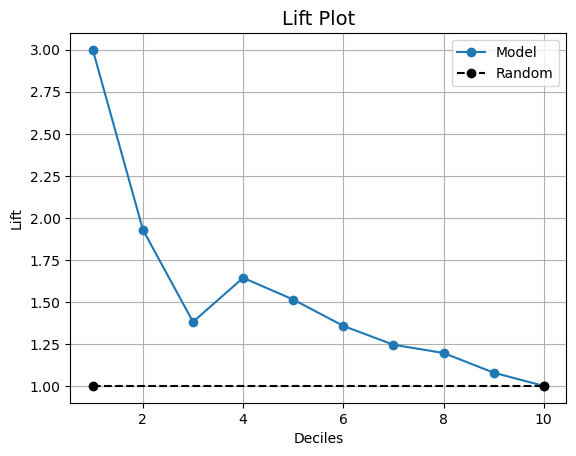

In [194]:
# LIFT PLOT
kds.metrics.plot_lift(TestSet["prediction"],TestSet["proba churn"])

## Creating Final Prediction: Merging tables Campaigns & Gifts

In [195]:
CampaignGiftsf = pd.merge(giftsf, campaigns, how='left', on='campaignID')

In [196]:
CampaignGiftsf = CampaignGiftsf.rename(columns={'date_x': 'gift_date', 'date_y': 'campaign_date'})
CampaignGiftsf

,donorID,campaignID,amount,gift_date,Over_30_Camp6169,Over_30_Camp7244,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362,campaign_date,lettersSent,CostUnit
0,D142006,NaN,3198.00,2016-02-10,False,False,2.0,3239.00,1619.500000,3198.00,41.00,2016-02-10,2017-06-26,True,NaT,NaN,NaN
1,D136501,6169.0,1430.61,2018-09-21,True,False,1.0,1430.61,1430.610000,1430.61,1430.61,2018-09-21,2018-09-21,True,2018-09-04,34888.0,0.87
2,D119130,4801.0,1000.00,2017-07-23,False,False,1.0,1000.00,1000.000000,1000.00,1000.00,2017-07-23,2017-07-23,True,2017-07-13,49023.0,0.21
3,D104753,7536.0,1000.00,2019-12-30,False,False,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2019-12-15,37187.0,0.35
4,D113573,4678.0,1000.00,2017-02-13,False,False,2.0,2250.00,1125.000000,1250.00,1000.00,2015-01-31,2017-02-13,True,2017-02-03,34382.0,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35516,D109523,NaN,0.26,2015-09-27,False,False,6.0,3.84,0.640000,1.50,0.13,2014-10-12,2018-09-07,False,NaT,NaN,NaN
35517,D115502,4135.0,0.25,2015-02-26,False,False,4.0,70.25,17.562500,25.00,0.25,2015-02-26,2016-12-22,False,2015-02-07,34513.0,0.20
35518,D124744,5016.0,0.20,2017-10-31,False,False,1.0,0.20,0.200000,0.20,0.20,2017-10-31,2017-10-31,False,2017-10-27,8760.0,0.05
35519,D141801,4144.0,0.20,2015-06-11,False,False,3.0,40.20,13.400000,20.00,0.20,2015-02-14,2015-06-30,False,2015-06-06,34762.0,0.21


In [197]:
#created a new column visit_count and calculated no of visit
CampaignGiftsf['n_campaign_Camp7362'] = CampaignGiftsf[CampaignGiftsf['campaign_date'] < '2020-02-01'].groupby('donorID')['campaignID'].transform('count')

In [198]:
#Test
CampaignGiftsf[CampaignGiftsf['donorID'] == 'D100023']

,donorID,campaignID,amount,gift_date,Over_30_Camp6169,Over_30_Camp7244,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362,campaign_date,lettersSent,CostUnit,n_campaign_Camp7362
22038,D100023,6169.0,15.0,2018-09-15,False,False,3.0,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,2018-09-04,34888.0,0.87,4.0
29117,D100023,7346.0,6.5,2019-09-07,False,False,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2019-08-25,15304.0,0.61,4.0
29118,D100023,7108.0,6.5,2019-04-10,False,False,3.0,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,2019-04-01,25914.0,0.46,4.0
29121,D100023,4210.0,6.5,2015-10-20,False,False,3.0,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False,2015-10-18,24753.0,0.20,4.0


In [199]:
CampaignGiftsf.head()

,donorID,campaignID,amount,gift_date,Over_30_Camp6169,Over_30_Camp7244,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362,campaign_date,lettersSent,CostUnit,n_campaign_Camp7362
0,D142006,NaN,3198.00,2016-02-10,False,False,2.0,3239.00,1619.50,3198.00,41.00,2016-02-10,2017-06-26,True,NaT,NaN,NaN,NaN
1,D136501,6169.0,1430.61,2018-09-21,True,False,1.0,1430.61,1430.61,1430.61,1430.61,2018-09-21,2018-09-21,True,2018-09-04,34888.0,0.87,1.0
2,D119130,4801.0,1000.00,2017-07-23,False,False,1.0,1000.00,1000.00,1000.00,1000.00,2017-07-23,2017-07-23,True,2017-07-13,49023.0,0.21,1.0
3,D104753,7536.0,1000.00,2019-12-30,False,False,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,2019-12-15,37187.0,0.35,4.0
4,D113573,4678.0,1000.00,2017-02-13,False,False,2.0,2250.00,1125.00,1250.00,1000.00,2015-01-31,2017-02-13,True,2017-02-03,34382.0,0.12,1.0


In [200]:
print(CampaignGiftsf.columns)

Index(['donorID', 'campaignID', 'amount', 'gift_date', 'Over_30_Camp6169',
       'Over_30_Camp7244', 'n_gifts_camp7362', 'sum_gifts_camp7362',
       'avg_gifts_camp7362', 'max_gifts_camp7362', 'min_gifts_camp7362',
       'firstGift_camp7362', 'lastGift_camp7362', 'donation_over_30_camp7362',
       'campaign_date', 'lettersSent', 'CostUnit', 'n_campaign_Camp7362'],
      dtype='object')


In [201]:
CG_aggf=CampaignGiftsf[['donorID','n_campaign_Camp7362','n_gifts_camp7362','sum_gifts_camp7362','avg_gifts_camp7362','max_gifts_camp7362','min_gifts_camp7362','firstGift_camp7362','lastGift_camp7362','donation_over_30_camp7362']].copy()

In [202]:
CG_aggf

,donorID,n_campaign_Camp7362,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362
0,D142006,NaN,2.0,3239.00,1619.500000,3198.00,41.00,2016-02-10,2017-06-26,True
1,D136501,1.0,1.0,1430.61,1430.610000,1430.61,1430.61,2018-09-21,2018-09-21,True
2,D119130,1.0,1.0,1000.00,1000.000000,1000.00,1000.00,2017-07-23,2017-07-23,True
3,D104753,4.0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,D113573,1.0,2.0,2250.00,1125.000000,1250.00,1000.00,2015-01-31,2017-02-13,True
...,...,...,...,...,...,...,...,...,...,...
35516,D109523,NaN,6.0,3.84,0.640000,1.50,0.13,2014-10-12,2018-09-07,False
35517,D115502,4.0,4.0,70.25,17.562500,25.00,0.25,2015-02-26,2016-12-22,False
35518,D124744,1.0,1.0,0.20,0.200000,0.20,0.20,2017-10-31,2017-10-31,False
35519,D141801,3.0,3.0,40.20,13.400000,20.00,0.20,2015-02-14,2015-06-30,False


In [203]:
CG_aggf[CG_aggf['donorID'] == 'D100023']

,donorID,n_campaign_Camp7362,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362
22038,D100023,4.0,3.0,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False
29117,D100023,4.0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
29118,D100023,4.0,3.0,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False
29121,D100023,4.0,3.0,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False


In [204]:
CG_aggf=CG_aggf[~CG_aggf.duplicated(subset='donorID')]

In [205]:
CG_aggf

,donorID,n_campaign_Camp7362,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362
0,D142006,NaN,2.0,3239.00,1619.500000,3198.00,41.00,2016-02-10,2017-06-26,True
1,D136501,1.0,1.0,1430.61,1430.610000,1430.61,1430.61,2018-09-21,2018-09-21,True
2,D119130,1.0,1.0,1000.00,1000.000000,1000.00,1000.00,2017-07-23,2017-07-23,True
3,D104753,4.0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,D113573,1.0,2.0,2250.00,1125.000000,1250.00,1000.00,2015-01-31,2017-02-13,True
...,...,...,...,...,...,...,...,...,...,...
35496,D105284,2.0,2.0,2.00,1.000000,1.00,1.00,2015-05-11,2015-07-18,False
35498,D118586,1.0,1.0,1.00,1.000000,1.00,1.00,2015-04-25,2015-04-25,False
35502,D114463,1.0,1.0,1.00,1.000000,1.00,1.00,2017-03-29,2017-03-29,False
35510,D131428,1.0,55.0,109.00,1.981818,2.00,1.00,2014-11-12,2017-07-04,False


In [206]:
#Test
CG_aggf[CG_aggf['donorID'] == 'D100023']

,donorID,n_campaign_Camp7362,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362
22038,D100023,4.0,3.0,28.0,9.333333,15.0,6.5,2015-10-20,2019-04-10,False


# Merging with Donor Table

In [207]:
Basetablef = pd.merge(donors, CG_aggf, how='left', on='donorID')

In [208]:
Basetablef

,donorID,zipcode,province,region,gender,language,dateOfBirth,n_campaign_Camp7362,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362
0,D100001,1861,1,1,0,1,1967-12-24,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
1,D100002,2260,2,1,1,1,1952-01-14,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
2,D100003,1780,1,1,1,1,1986-12-23,12.0,12.0,46.0,3.833333,5.0,3.0,2017-07-27,2019-06-17,False
3,D100004,1020,3,2,0,2,1952-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
4,D100005,1020,3,2,0,2,1986-06-25,3.0,3.0,20.0,6.666667,10.0,5.0,2016-10-26,2019-04-18,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44686,D144687,4900,7,3,1,2,1970-09-12,1.0,1.0,10.0,10.000000,10.0,10.0,2015-11-06,2015-11-06,False
44687,D144688,3600,11,1,1,1,1972-11-28,1.0,1.0,15.0,15.000000,15.0,15.0,2017-07-27,2017-07-27,False
44688,D144689,3061,1,1,1,1,1967-04-21,3.0,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN
44689,D144690,1950,1,1,1,2,1976-05-07,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN


# Create final prediction table

In [209]:
Camp7362=read_csv(inputData + "/selectioncampaign7362.csv")

In [210]:
Camp7362

,donorID
0,D134242
1,D126503
2,D104392
3,D105905
4,D120506
...,...
26517,D114719
26518,D134824
26519,D143259
26520,D123936


In [211]:
FinalSet = pd.merge(Camp7362, Basetablef , how='left', on='donorID')

In [212]:
final_date = datetime(2020, 2, 1)

# Function to calculate age
def calculate_age(birthdate, specific_date):
    return specific_date.year - birthdate.year - ((specific_date.month, specific_date.day) < (birthdate.month, birthdate.day))

# Calculate age for training data (as of 04/09/2018)
FinalSet['age_train'] = FinalSet['dateOfBirth'].apply(lambda x: calculate_age(x, final_date))

In [213]:
FinalSet['LOR']= final_date - FinalSet['firstGift_camp7362']

In [214]:
FinalSet['LOR']= FinalSet['LOR'].dt.days

In [215]:
FinalSet['DaysLastGift']= final_date - FinalSet['lastGift_camp7362']
FinalSet['DaysLastGift']= FinalSet['DaysLastGift'].dt.days

In [216]:
import numpy as np

Days=FinalSet['DaysLastGift']
ThreeYears= Days  - 1095
OneYear= Days - 365
SixMonths= Days - 180

condition= Days != 0
FinalSet.loc[condition, 'ThreeYears'] = ThreeYears
FinalSet.loc[condition, 'OneYear'] = OneYear
FinalSet.loc[condition, 'SixMonths'] = SixMonths

FinalSet.loc[FinalSet['ThreeYears'] > 0,'ThreeYears'] = 0
FinalSet.loc[FinalSet['OneYear'] > 0,'OneYear'] = 0
FinalSet.loc[FinalSet['SixMonths'] > 0,'SixMonths'] = 0

FinalSet.loc[FinalSet['ThreeYears'] < 0,'ThreeYears'] = 1
FinalSet.loc[FinalSet['OneYear'] < 0,'OneYear'] = 1
FinalSet.loc[FinalSet['SixMonths'] < 0,'SixMonths'] = 1

In [217]:
FinalSet['n_campaign_Camp7362'] = FinalSet['n_campaign_Camp7362'].fillna(0)
FinalSet['n_gifts_camp7362'] = FinalSet['n_gifts_camp7362'].fillna(0)
FinalSet['sum_gifts_camp7362'] = FinalSet['sum_gifts_camp7362'].fillna(0)
FinalSet['avg_gifts_camp7362'] = FinalSet['avg_gifts_camp7362'].fillna(0)
FinalSet['max_gifts_camp7362'] = FinalSet['max_gifts_camp7362'].fillna(0)
FinalSet['min_gifts_camp7362'] = FinalSet['min_gifts_camp7362'].fillna(0)
FinalSet['firstGift_camp7362'] = FinalSet['firstGift_camp7362'].fillna(0)
FinalSet['lastGift_camp7362'] = FinalSet['lastGift_camp7362'].fillna(0)
FinalSet['donation_over_30_camp7362'] = FinalSet['donation_over_30_camp7362'].fillna(0)

FinalSet['LOR'] = FinalSet['LOR'].fillna(0)
FinalSet['DaysLastGift'] = FinalSet['DaysLastGift'].fillna(0)
FinalSet['ThreeYears'] = FinalSet['ThreeYears'].fillna(0)
FinalSet['OneYear'] = FinalSet['OneYear'].fillna(0)
FinalSet['SixMonths'] = FinalSet['SixMonths'].fillna(0)

In [218]:
FinalSet = FinalSet.dropna(subset=['gender'])

In [219]:
FinalSet.isnull().sum()

donorID                      0
zipcode                      0
province                     0
region                       0
gender                       0
language                     0
dateOfBirth                  0
n_campaign_Camp7362          0
n_gifts_camp7362             0
sum_gifts_camp7362           0
avg_gifts_camp7362           0
max_gifts_camp7362           0
min_gifts_camp7362           0
firstGift_camp7362           0
lastGift_camp7362            0
donation_over_30_camp7362    0
age_train                    0
LOR                          0
DaysLastGift                 0
ThreeYears                   0
OneYear                      0
SixMonths                    0
dtype: int64

In [220]:
FinalSet['DaysLastGift'].astype(int)

0           0
1           0
2           0
3           0
4           0
         ... 
26517       0
26518       0
26519    1193
26520     941
26521       0
Name: DaysLastGift, Length: 26511, dtype: int32

In [221]:
FinalSet['zipcode']= FinalSet['zipcode'].astype(int)
FinalSet['province']=FinalSet['province'].astype(int)
FinalSet['region']=FinalSet['region'].astype(int)
FinalSet['gender']=FinalSet['gender'].astype(int)
FinalSet['language']=FinalSet['language'].astype(int)
FinalSet['n_campaign_Camp7362']=FinalSet['n_campaign_Camp7362'].astype(int)
FinalSet['n_gifts_camp7362']=FinalSet['n_gifts_camp7362'].astype(int)
FinalSet['n_campaign_Camp7362']=FinalSet['n_campaign_Camp7362'].astype(int)
FinalSet['n_campaign_Camp7362']=FinalSet['n_campaign_Camp7362'].astype(int)

In [222]:
FinalSet.dtypes

donorID                              object
zipcode                               int32
province                              int32
region                                int32
gender                                int32
language                              int32
dateOfBirth                  datetime64[ns]
n_campaign_Camp7362                   int32
n_gifts_camp7362                      int32
sum_gifts_camp7362                  float64
avg_gifts_camp7362                  float64
max_gifts_camp7362                  float64
min_gifts_camp7362                  float64
firstGift_camp7362                   object
lastGift_camp7362                    object
donation_over_30_camp7362            object
age_train                           float64
LOR                                 float64
DaysLastGift                        float64
ThreeYears                          float64
OneYear                             float64
SixMonths                           float64
dtype: object

In [223]:
bins= [0,10,20,30,40,50,60,float('inf')]
labels=[1,2,3,4,5,6,7]
FinalSet['agegroup']= pd.cut(FinalSet['age_train'],bins=bins,labels=labels,right=False)

In [224]:
bins= [0,1000,2000,3000,4000,5000,6000,float('inf')]
labels=[1,2,3,4,5,6,7]
FinalSet['DaysLastgroup']= pd.cut(FinalSet['DaysLastGift'],bins=bins,labels=labels,right=False)

In [225]:
bins= [0,1000,2000,3000,4000,5000,6000,float('inf')]
labels=[1,2,3,4,5,6,7]
FinalSet['LORgroup']= pd.cut(FinalSet['LOR'],bins=bins,labels=labels,right=False)

In [226]:
bins= [0,25,50,100,500,750,1000,float('inf')]
labels=[1,2,3,4,5,6,7]
FinalSet['sum_giftsgroup']= pd.cut(FinalSet['sum_gifts_camp7362'],bins=bins,labels=labels,right=False)

In [227]:
bins= [0,25,50,100,500,float('inf')]
labels=[1,2,3,4,5]
FinalSet['avg_giftsgroup']= pd.cut(FinalSet['avg_gifts_camp7362'],bins=bins,labels=labels,right=False)

In [228]:
FinalSet['max_gifts_camp7362']=FinalSet['max_gifts_camp7362'].round().astype(int)
FinalSet['min_gifts_camp7362']=FinalSet['min_gifts_camp7362'].round().astype(int)

In [229]:
FinalSet['sum_giftsgroup'].value_counts()

sum_giftsgroup
1    19488
2     3066
3     1960
4     1945
5       33
7       11
6        8
Name: count, dtype: int64

In [230]:
FinalSet['agegroup']=FinalSet['agegroup'].astype(int)
FinalSet['LORgroup']=FinalSet['LORgroup'].astype(int)
FinalSet['DaysLastgroup']=FinalSet['DaysLastgroup'].astype(int)
FinalSet['sum_giftsgroup']=FinalSet['sum_giftsgroup'].astype(int)
FinalSet['avg_giftsgroup']=FinalSet['avg_giftsgroup'].astype(int)


In [231]:
pd.set_option('display.max_columns', None)
FinalSet

,donorID,zipcode,province,region,gender,language,dateOfBirth,n_campaign_Camp7362,n_gifts_camp7362,sum_gifts_camp7362,avg_gifts_camp7362,max_gifts_camp7362,min_gifts_camp7362,firstGift_camp7362,lastGift_camp7362,donation_over_30_camp7362,age_train,LOR,DaysLastGift,ThreeYears,OneYear,SixMonths,agegroup,DaysLastgroup,LORgroup,sum_giftsgroup,avg_giftsgroup
0,D134242,3580,11,1,1,1,1966-09-28,0,0,0.0,0.0,0,0,0,0,0,53.0,0.0,0.0,0.0,0.0,0.0,6,1,1,1,1
1,D126503,4250,7,3,1,2,1949-10-20,0,0,0.0,0.0,0,0,0,0,0,70.0,0.0,0.0,0.0,0.0,0.0,7,1,1,1,1
2,D104392,4820,7,3,0,2,1974-05-03,0,0,0.0,0.0,0,0,0,0,0,45.0,0.0,0.0,0.0,0.0,0.0,5,1,1,1,1
3,D105905,8370,5,1,1,1,1970-09-18,2,0,0.0,0.0,0,0,0,0,0,49.0,0.0,0.0,0.0,0.0,0.0,5,1,1,1,1
4,D120506,8020,5,1,1,1,1973-09-19,0,0,0.0,0.0,0,0,0,0,0,46.0,0.0,0.0,0.0,0.0,0.0,5,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26517,D114719,8560,5,1,1,1,1972-05-22,0,0,0.0,0.0,0,0,0,0,0,47.0,0.0,0.0,0.0,0.0,0.0,5,1,1,1,1
26518,D134824,2920,2,1,1,1,1975-01-31,0,0,0.0,0.0,0,0,0,0,0,45.0,0.0,0.0,0.0,0.0,0.0,5,1,1,1,1
26519,D143259,8430,5,1,1,1,1995-02-12,1,1,40.0,40.0,40,40,2016-10-26 00:00:00,2016-10-26 00:00:00,True,24.0,1193.0,1193.0,0.0,0.0,0.0,3,2,2,2,2
26520,D123936,9880,6,1,1,1,1977-01-20,1,1,20.0,20.0,20,20,2017-07-05 00:00:00,2017-07-05 00:00:00,False,43.0,941.0,941.0,1.0,0.0,0.0,5,1,1,1,1


In [232]:
FinalSet.rename(columns={'donation_over_30_camp7362': 'donation_over_30','n_gifts_camp7362':'n_gifts'}, inplace=True)

In [233]:
finalpredictions=model.predict(FinalSet[['DaysLastgroup',
 'LORgroup',
 'OneYear',
 'ThreeYears',
 'agegroup',
 'avg_giftsgroup',
 'donation_over_30',
 'gender',
 'language',
 'n_gifts',
 'zipcode']])

In [234]:
finalpredictions

array([0, 0, 0, ..., 0, 0, 0])

In [235]:
no_donor = np.sum(finalpredictions == 0)
donor = np.sum(finalpredictions == 1)

print(f"Number of 0s (no donor): {no_donor}")
print(f"Number of 1s (donor): {donor}")

Number of 0s (no donor): 26373
Number of 1s (donor): 138


In [236]:
# Prepare input data for scoring
new_data = FinalSet[['DaysLastgroup', 'LORgroup', 'OneYear', 'ThreeYears', 'agegroup', 
                     'avg_giftsgroup', 'donation_over_30', 'gender', 'language', 
                     'n_gifts', 'zipcode']]

# Make predictions
probabilities = model.predict_proba(new_data)[:, 1]  # Get probabilities for the 'will contribute' class

# Add probabilities to your DataFrame
FinalSet['ContributionProbability'] = probabilities

# Now FinalSet contains a new column with the predicted probabilities
YES=(FinalSet['ContributionProbability'] > 0.5).sum()
print(YES)

138


In [237]:
filled_count = FinalSet['ContributionProbability'].notna().sum()

# Output the result
print(f"Number of filled values in 'ContributionProbability': {filled_count}")

Number of filled values in 'ContributionProbability': 26511
